#  Arbitrary Periodic Forcing (Fourier Series)

## Sympy

SymPy is a Python package for symbolic computing. It can do many symbolic operations, for instance, integration, differentiation, linear algebra, etc. See http://sympy.org for more details of the features and the documentation. Today we will cover how to do integrals using SymPy and use it to find the Fourier series that represents a sawtooth function.

In [1]:
import sympy as sm

The function `init_printing()` enables LaTeX based rendering in the Jupyter notebook of all SymPy objects.

In [2]:
sm.init_printing()

Symbols can be created by using the `symbols()` function.

In [3]:
x, y, z = sm.symbols('x, y, z')

In [4]:
x, y, z

The `integrate()` function allows you to do symbolic indefinite or definite integrals. Note that the constants of integration are not included in indefinite integrals.

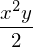

In [5]:
sm.integrate(x * y, x)

The `Integral` class creates and unevaluated integral, where as the `integrate()` function automatically evaluates the integral.

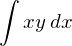

In [6]:
expr = sm.Integral(x * y, x)
expr

To evaluate the unevaluated form you call the `.doit()` method. Note that all unevaluated SymPy objects have this method.

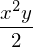

In [7]:
expr.doit()

This shows how to create an unevaluated definite integral, store it in a variable, and then evaluate it.

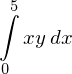

In [8]:
expr = sm.Integral(x * y, (x, 0, 5))
expr

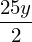

In [9]:
expr.doit()

# Fourier Coefficients for the Sawtooth function

Now let's compute the Fourier coefficients for a saw tooth function. The function that describes the saw tooth is:

$$
F(t) = 
\begin{cases} 
      A \left( \frac{4t}{T} - 1 \right) & 0 \leq t \leq T/2 \\
      A \left( 3 - \frac{4t}{t} \right) & T/2 \leq t \leq T 
\end{cases}
$$

where:

- $A$ is the amplitude of the saw tooth
- $T$ is the period of the saw tooth
- $\omega_T$ is the frequency of the saw tooth, i.e. $\omega_T = \frac{2\pi}{T}$
- $t$ is time

This is a piecewise function with two parts from $t=0$ to $t=T$.

In [10]:
A, T, wT, t = sm.symbols('A, T, omega_T, t', real=True, positive=True)
A, T, wT, t

The first Fourier coefficient $a_0$ describes the average value of the periodic function. and is:

$$a_0 = \frac{2}{T} \int_0^T F(t) dt$$

This integral will have to be done in two parts:

$$a_0 = a_{01} + a_{02} = \frac{2}{T} \int_0^{T/2} F(t) dt + \frac{2}{T} \int_{T/2}^T F(t) dt$$

These two integrals are evaluated below. Note that $a_0$ evaluates to zero. This is because the average of our function is 0.

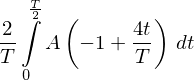

In [11]:
ao_1 = 2 / T * sm.Integral(A * (4 * t / T - 1), (t, 0, T / 2))
ao_1

In [12]:
ao_1.doit()

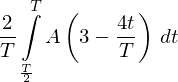

In [13]:
ao_2 = 2 / T * sm.Integral(A * (3 - 4 * t / T), (t, T / 2, T))
ao_2

In [14]:
ao_2.doit()

But SymPy can also handle piecewise directly. The following shows how to define a piecewise function.

In [15]:
F_1 = A * (4 * t / T - 1)
F_2 = A * (3 - 4 * t / T)

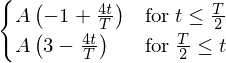

In [16]:
F = sm.Piecewise((F_1, t<=T/2),
                 (F_2, T/2<=t))
F

The integral can be taken of the entire piecewise function in one call.

In [17]:
sm.integrate(F, (t, 0, T))

Now the Fourier coefficients $a_n$ and $b_n$ can be computed.

$$
a_n = \frac{2}{T}\int_0^T F(t) \cos n\omega_Tt dt \\
b_n = \frac{2}{T}\int_0^T F(t) \sin n\omega_Tt dt
$$

In [18]:
n = sm.symbols('n', real=True, positive=True)

For $a_n$:

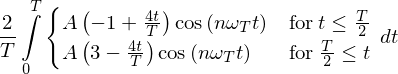

In [19]:
an = 2 / T * sm.Integral(F * sm.cos(n * wT * t), (t, 0, T))
an

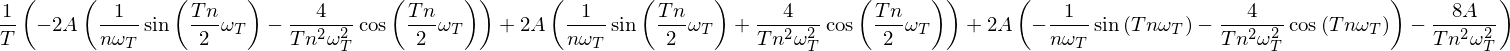

In [20]:
an.doit()

This can be simplified:

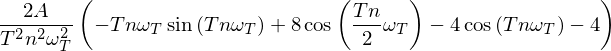

In [21]:
an = an.doit().simplify()
an

Now substitute the $2\pi/T$ for $\omega_T$.

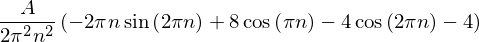

In [22]:
an = an.subs({wT: 2 * sm.pi / T})
an

Let's see how this function varies with increasing $n$. We will use a loop but the SymPy expressions will not automatically display because they are inside a loop. So we need to use SymPy's `latex()` function and the IPython display tools. SymPy's `latex()` function  transforms the SymPy expression into a string of matching LaTeX commands.

In [23]:
sm.latex(an, mode='inline')

'$\\frac{A}{2 \\pi^{2} n^{2}} \\left(- 2 \\pi n \\sin{\\left (2 \\pi n \\right )} + 8 \\cos{\\left (\\pi n \\right )} - 4 \\cos{\\left (2 \\pi n \\right )} - 4\\right)$'

The `display()` and `LaTeX()` functions then turn the LaTeX string in to a displayed version.

In [24]:
from IPython.display import display, Latex 

Now we can see how $a_n$ varies with $n=1,2,\ldots$.

In [25]:
for n_i in range(1, 6):
    ans = an.subs({n: n_i})
    display(Latex('$a_{} = $'.format(n_i) + sm.latex(ans, mode='inline')))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

For even $n$ values the coefficient is zero and for even values it variers with the inverse of $n^2$. More precisely:

$$
a_n =
\begin{cases}
0 & \textrm{if }n\textrm{ is even} \\
-\frac{8A}{n^2\pi^2} & \textrm{if }n\textrm{ is odd}
\end{cases}
$$

SymPy can actually reduce this further if your set the assumption that $n$ is an integer.

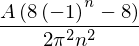

In [26]:
n = sm.symbols('n', real=True, positive=True, integer=True)
an = 2 / T * sm.Integral(F * sm.cos(n * wT * t), (t, 0, T))
an = an.doit().simplify()
an.subs({wT: 2 * sm.pi / T})

The odd and even versions can be computed by setting the respective assumptions.

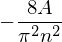

In [27]:
n = sm.symbols('n', real=True, positive=True, integer=True, odd=True)
an = 2 / T * sm.Integral(F * sm.cos(n * wT * t), (t, 0, T))
an = an.doit().simplify()
an.subs({wT: 2 * sm.pi / T})

Note that $b_n$ is always zero:

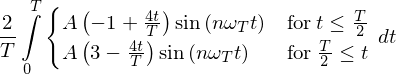

In [28]:
bn = 2 / T * sm.Integral(F * sm.sin(n * wT * t), (t, 0, T))
bn

In [29]:
bn.doit().simplify().subs({wT: 2 * sm.pi / T})

# Random questions questions from class

The source code for any function is shown with the double question mark.

In [30]:
sm.Integral??

The location of the file the function comes from can be found by accessing the `__file__` attribute.

In [31]:
sm.__file__

'/usr/lib/python3.5/site-packages/sympy/__init__.py'

SymPy can handle unit for you too.

In [32]:
from sympy.physics.units import meter, kilogram, second

In [33]:
a = 10 * second
a

In [34]:
b = 5 * meter

In [35]:
c = 6 * kilogram

In [36]:
a, b, c

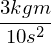

In [37]:
expr = c * b / a**2
expr

In [38]:
from sympy.physics.units import newton

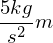

In [39]:
5 * newton

# Numerical evalution of the Fourier Series

Now the Fourier coefficients can be used to plot the approximation of the saw tooth forcing function.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following function plots the actual sawtooth function. It does it all in one line by cleverly using the absolute value and the modulo functions.

In [41]:
def sawtooth(A, T, t):
    return (4 * A / T) * (T / 2 - np.abs(t % T - T / 2) ) - A

In [42]:
A = 1
T = 2
t = np.linspace(0, 5, num=500)

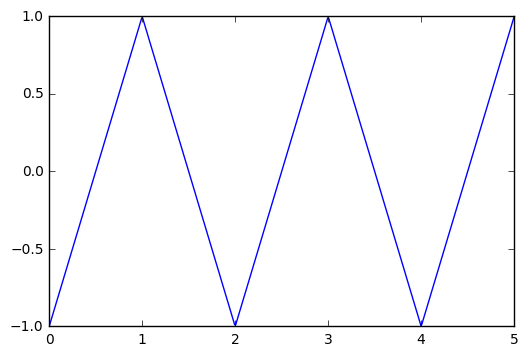

In [43]:
plt.figure()

plt.plot(t, sawtooth(A, T, t));

# Exercise

Write a function that computes the Fourier approximation of the sawtooth function for a given value of $n$, i.e. using a finite number of terms. Then plot it for $n=2, 4, 6, 8, 10$ on top of the actual sawtooth function. How many terms of the infinite series are needed to get a good sawtooth?

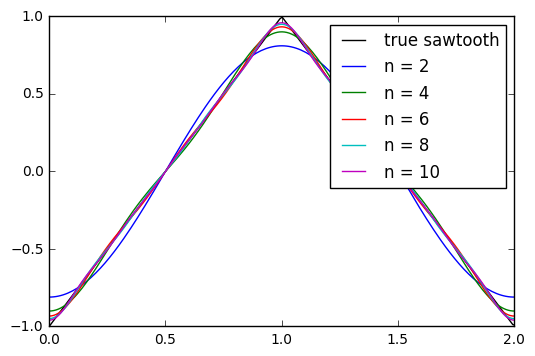

In [44]:
def sawtooth_approximation(n, A, T, t):
    # odd values of indexing variable up to n
    n_i = np.arange(1, n+1, 2)[:, np.newaxis]
    # cos coefficients
    an = -8 * A / (n_i**2 * np.pi**2)
    # sawtooth frequency
    wT = 2 * np.pi / T
    # sum of n cos functions
    f = np.sum(an * np.cos(n_i * wT * t), axis=0)
    return f

# plot sawtooth
f = sawtooth(A, T, t)
plt.plot(t, f, color='k', label='true sawtooth')

for n in np.arange(2, 12, 2):
    f_approx = sawtooth_approximation(n, A, T, t)
    plt.plot(t, f_approx, label='n = {}'.format(n))

plt.legend()
# zoom in a bit on the interesting bit
plt.xlim(0, T)

# Exercise

Now, using the Fourier series you've developed compute the response of a linear system to the sawtooth function and plot the steady state trajectory of $x$ give:

$$m\ddot{x} + c\dot{x} + kx = F(t)$$

Use:

- $m$: 100 kg
- $\omega_n$: 10 rad/s
- $\zeta$: 0.01
- $T=\frac{2\pi}{5 rad/s}$
- $A=1000N$

Investigate the difference in steady state response for different approximations of $F(t)$, i.e. various $n$, and report your findings in a markdown cell.

The steady state response to a forcing function with Fourier coefficients $a_0$, $a_n$, and $b_n$ is:

$$
x_\text{ss}(t) = \frac{a_0}{2k} + \sum_{n=1}^\infty \left[ x_\text{cn}(t) + x_\text{sn}(t) \right]
$$

where

$$
\begin{aligned}
x_\text{cn}(t) &= \frac{a_n/m}{\sqrt{\left[ \omega_n^2 - \left( n\omega_T \right)^2 \right]^2 + \left(2\zeta\omega_n n\omega_T\right)^2}} \cos\left(n\omega_T t - \theta_n\right) \\
x_\text{sn}(t) &= \frac{b_n/m}{\sqrt{\left[ \omega_n^2 - \left( n\omega_T \right)^2 \right]^2 + \left(2\zeta\omega_n n\omega_T\right)^2}} \sin\left(n\omega_T t - \theta_n\right)
\end{aligned}
$$

and

$$
\theta_n = \tan^{-1} \frac{2\zeta\omega_n n \omega_T}{\omega_n^2 - \left(n \omega_T\right)^2}
$$

We have already found that $a_0 = 0$ and $b_n = 0$ for all $n$, so we only need to consider the $x_\text{cn}$ terms.

<function __main__.sawtooth_response>

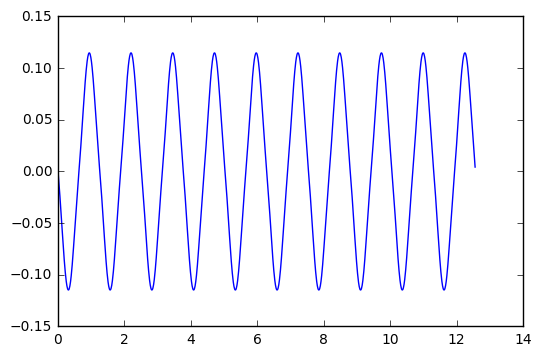

In [45]:
from ipywidgets import interact

# system parameters
m = 100
wn = 10
z = 0.01
wT = 5
T = 2 * np.pi / wT
A = 1000

t = np.arange(0, 10*T, 0.01)

def sawtooth_response(N=10):
    """
    Computes the steady state m-c-k response to a sawtooth and
    plots the result.
    """
    # column array of n/an values
    n = np.arange(1, N+1, 2)[:, np.newaxis]
    an = -8 * A / (n**2 * np.pi**2)
    
    # phase shift of each term in the series
    theta_n = np.arctan2(2*z*wn*n*wT, wn**2-(n*wT)**2)
    
    # an is a col and t is 1D, so each row of xcn is a term
    # in the series at all times in t
    xcn = an / m / np.sqrt((wn**2 - (n*wT)**2)**2 +
                            (2*z*wn*n*wT)**2) * \
                   np.sin(n*wT*t - theta_n)
    
    # x is the sum of each xcn term (the rows)
    x = np.sum(xcn, axis=0)
    
    plt.plot(t, x)

interact(sawtooth_response, N=(2, 100, 2))

We can see from interacting with the slider to show the approximated response for different numbers of terms in the series approximation that there is not much of a difference in the response when $n > 4$. We already saw that the sawtooth approximation is decent around $n = 6$, so this isn't too surprising. Also, since the forcing function has a period exactly twice as long as the system's natural period, so there isn't much of an interesting interaction between the two frequencies involved. Try again with $\omega_n = 35$ rad/s, for example, to see the solution change dramatically with $n < 10$.